<a href="https://colab.research.google.com/github/Manas56/Machine_learning_projects/blob/main/eye_disease_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Corrected import statement
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Set dataset path
dataset_path = '/content/drive/My Drive/eye-dataset/dataset'

# Define rescaling layer
rescale = tf.keras.layers.Rescaling(1./255)

# Load train dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=dataset_path,
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Load validation dataset
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=dataset_path,
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',
)
validation_ds = validation_ds.map(lambda x, y: (rescale(x), y))

# Load test dataset (optional: shuffle=False if needed)
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=dataset_path,
    batch_size=32,
    image_size=(256, 256),
    label_mode='categorical',
    shuffle=False
)
test_ds = test_ds.map(lambda x, y: (rescale(x), y))


Found 4227 files belonging to 4 classes.
Using 3382 files for training.
Found 4227 files belonging to 4 classes.
Using 845 files for validation.
Found 4227 files belonging to 4 classes.


In [ ]:
# Check the first image shape in the training dataset
print("Shape of the first image in the training dataset:", next(iter(train_ds))[0][0].shape)
# Check the first image shape in the validation dataset
print("Shape of the first image in the validation dataset:", next(iter(validation_ds))[0][0].shape)
# Check the first image shape in the test dataset
print("Shape of the first image in the test dataset:", next(iter(test_ds))[0][0].shape)

Shape of the first image in the training dataset: (256, 256, 3)
Shape of the first image in the validation dataset: (256, 256, 3)
Shape of the first image in the test dataset: (256, 256, 3)


In [ ]:
# Initialize variables to store minimum and maximum pixel values
min_pixel_value = float('inf')
max_pixel_value = float('-inf')

# Iterate through the dataset
for images, _ in train_ds:
    # Compute the minimum and maximum pixel values in the current batch of images
    batch_min = tf.reduce_min(images)
    batch_max = tf.reduce_max(images)

    # Update overall minimum and maximum pixel values
    min_pixel_value = tf.minimum(min_pixel_value, batch_min)
    max_pixel_value = tf.maximum(max_pixel_value, batch_max)

# Print the minimum and maximum pixel values
print("Minimum pixel value:", min_pixel_value.numpy())
print("Maximum pixel value:", max_pixel_value.numpy())

Minimum pixel value: 0.0
Maximum pixel value: 1.0


In [ ]:
def visualize_images(path, target_size=(256, 256), num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image and resize
        image_path = os.path.join(path, image_filename)
        image = Image.open(image_path)
        image = image.resize(target_size)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

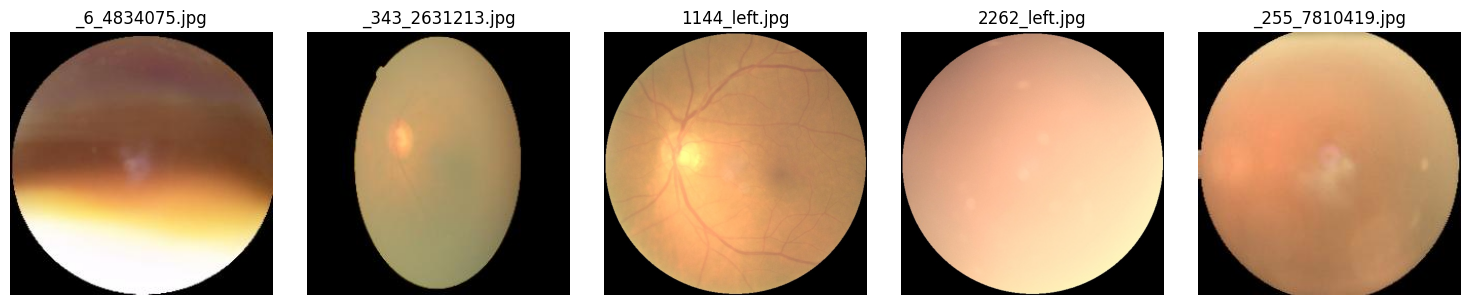

In [ ]:
import matplotlib.image as mpimg


def visualize_images(directory, num_images=5):
    """
    Visualizes random images from a directory.

    Args:
        directory (str): Path to the directory containing images.
        num_images (int, optional): Number of images to visualize. Defaults to 5.
    """

    # Get a list of image filenames
    image_filenames = [
        f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))
    ]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor="white")

    # Display each image
    for i, image_file in enumerate(selected_images):
        img_path = os.path.join(directory, image_file)
        img = mpimg.imread(img_path)  # Assign the result of imread to img
        axes[i].imshow(img)  # Display using imshow
        axes[i].axis("off")
        axes[i].set_title(image_file)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/My Drive/eye-dataset/dataset/cataract"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)


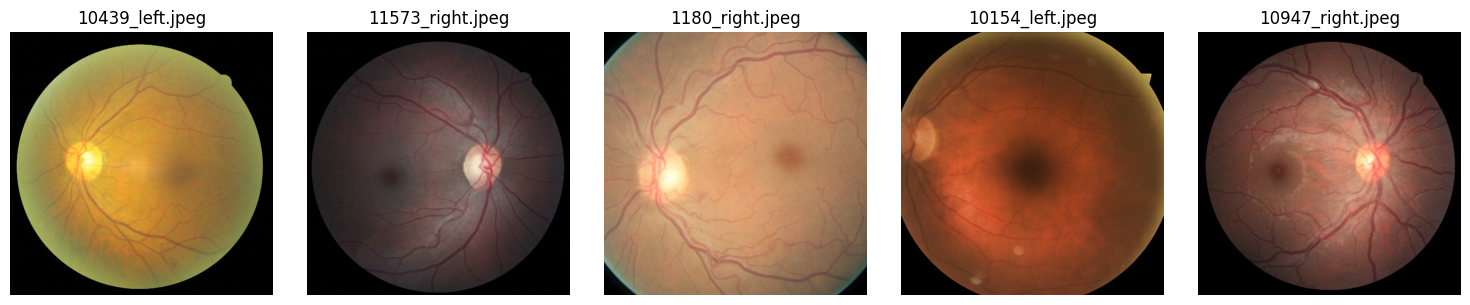

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/My Drive/eye-dataset/dataset/diabetic_retinopathy" # Changed to the correct Google Drive path

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

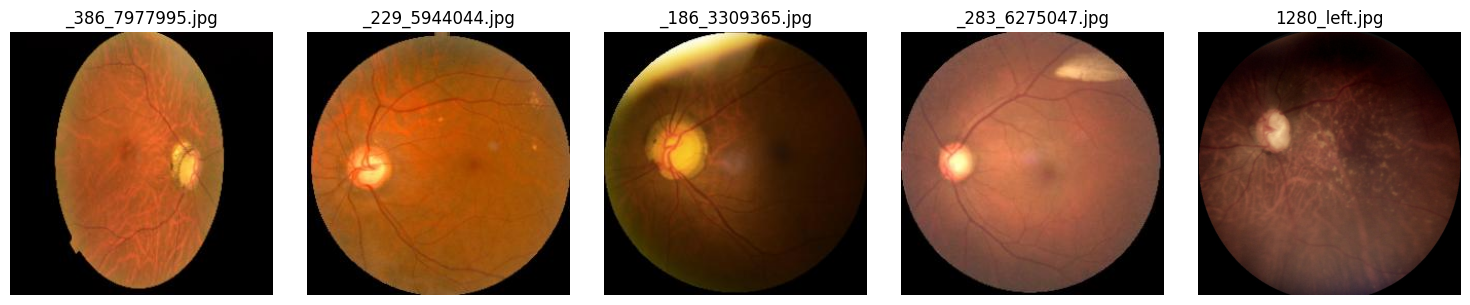

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/My Drive/eye-dataset/dataset/glaucoma"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

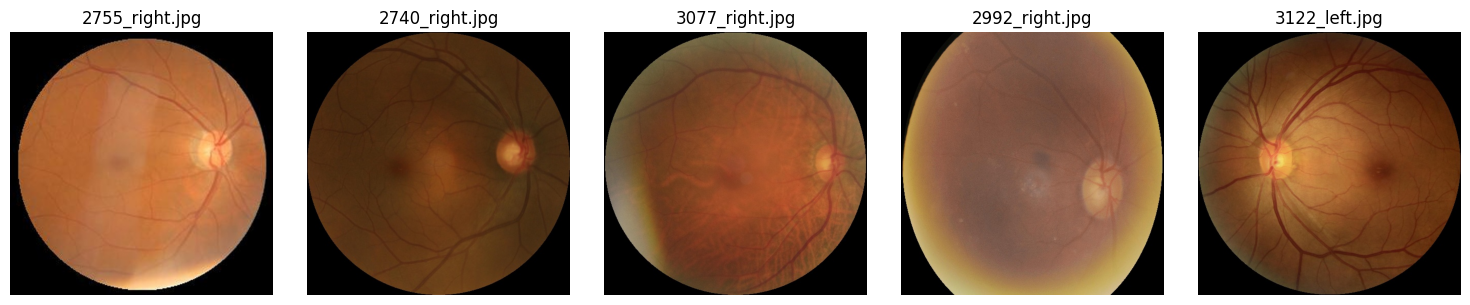

In [ ]:
 #Specify the path containing the images to visualize
path_to_visualize = "/content/drive/My Drive/eye-dataset/dataset/normal"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

In [ ]:
# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Reshape((64, 1)),  # Reshape for RNN input
    # tf.keras.layers.SimpleRNN(32),  # Simple RNN layer
    tf.keras.layers.Dense(4, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,743,044 (14.28 MB)

 Trainable params: 3,743,044 (14.28 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Define early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Fit the model with callbacks
history = model.fit(train_ds,
                    validation_data=validation_ds,
                    epochs=5,
                    callbacks=[early_stopping])

Epoch 1/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 519s 5s/step - accuracy: 0.4953 - loss: 1.1153 - val_accuracy: 0.6805 - val_loss: 0.7316
Epoch 2/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 492s 5s/step - accuracy: 0.7006 - loss: 0.6876 - val_accuracy: 0.7041 - val_loss: 0.6974
Epoch 3/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 500s 5s/step - accuracy: 0.7410 - loss: 0.5875 - val_accuracy: 0.7953 - val_loss: 0.5664
Epoch 4/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 523s 5s/step - accuracy: 0.7782 - loss: 0.5233 - val_accuracy: 0.7976 - val_loss: 0.5253
Epoch 5/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 520s 5s/step - accuracy: 0.7831 - loss: 0.5020 - val_accuracy: 0.7775 - val_loss: 0.5093


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_ds)
print("Test accuracy:", test_accuracy)

133/133 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.6325 - loss: 0.7372
Test accuracy: 0.7960728406906128


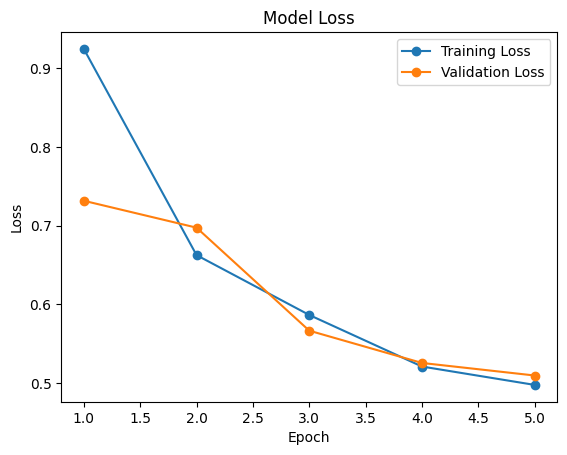

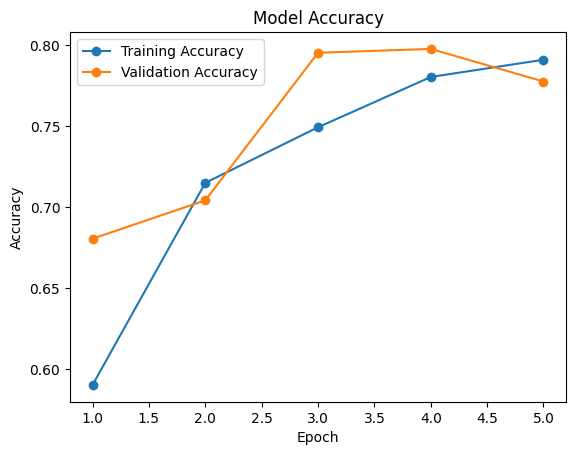

In [ ]:
# Define epochs
epochs = range(1, len(history.history['loss']) + 1)

# Plot training & validation loss
plt.plot(epochs, history.history['loss'], label='Training Loss', marker='o')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()